In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Compile_Label_Data.csv')

In [ ]:
df.head()

,Lemma,Label
0,Video show Nancy Pelosi say give shoot kill ...,1
1,George Soros ban Russia Pakistan Turkey Hung...,1
2,U N call decriminalize sex minor,1
3,Scientists struggle understand Antarctica wa...,1
4,La Reserva Federal present su nuevo sistema ...,1


In [ ]:
df.shape

(127420, 2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
x=df['Lemma']
y=df['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train_vec = vectorization.fit_transform(x_train)
x_test_vec = vectorization.transform(x_test)

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=7, min_samples_leaf=9, min_samples_split= 9)
dt.fit(x_train_vec,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9,
                       min_samples_split=9)

In [ ]:
dtpred=dt.predict(x_test_vec)

In [ ]:
dt.score(x_test_vec, y_test)

0.5797886255428243

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dtpred))

              precision    recall  f1-score   support

           0       0.69      0.16      0.26     17603
           1       0.57      0.94      0.71     20623

    accuracy                           0.58     38226
   macro avg       0.63      0.55      0.48     38226
weighted avg       0.62      0.58      0.50     38226



In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

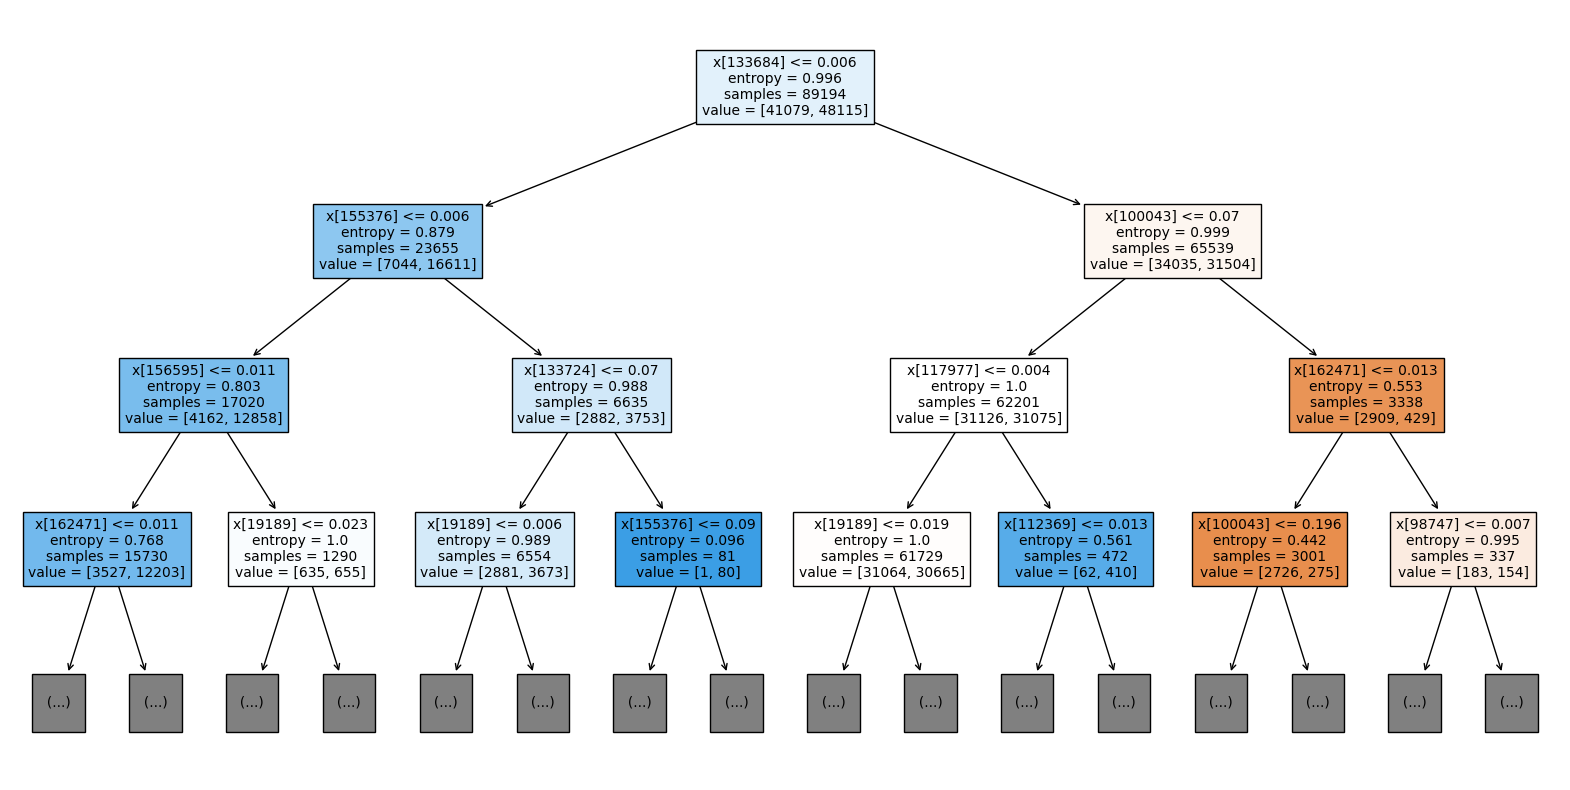

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt,max_depth=3, filled=True, fontsize=10)
plt.show()